## **Load library**


In [8]:
from warnings import filterwarnings
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from nltk.corpus import stopwords
from textblob import Word, TextBlob

## **Load data**

In [9]:
walmart = pd.read_csv('C:/Users/wwhla/Downloads/job/bootcamp/walmart/WalmartProducts.csv')


## **Filtering and single feature exploration**

In [10]:
walmart.head()

,index,Uniq Id,Crawl Timestamp,Pageurl,Website,Title,Rating,Review,Reviewer Name,Review Upvotes,Review Downvotes,Verified Purchaser,Recommended Purchase,Review Date,Five Star,Four Star,Three Star,Two Star,One Star
0,0,ee40ad5e6211d47a92fa1962938fad16,2020-03-17 03:37:35 +0000,https://www.walmart.com/reviews/product/15066091,walmart.com,"Sylvania 9"" Portable Dvd Player With Swivel Sc...",5.0,This product works great. It's exactly what I ...,Diane,0,0,No,No,12/4/2018,133.0,58.0,15.0,9.0,34.0
1,1,d10f87c07c206c72b0b5ddbf90541b38,2020-03-27 13:15:01 +0000,https://www.walmart.com/reviews/product/247042233,walmart.com,NaN,1.0,My carrier said this phone had been activated ...,Bren,0,0,No,No,12/21/2018,9.0,0.0,1.0,2.0,8.0
2,2,ef254e936e02a1b2bdaf89dd51b73403,2020-02-17 04:49:37 +0000,https://www.walmart.com/reviews/product/649827918,walmart.com,"VIZIO 65"" Class 4K UHD Quantum SmartCast Smart...",5.0,The picture on this TV is better than any TV I...,Hieronymesque,0,0,Yes,No,12/25/2019,180.0,39.0,5.0,8.0,13.0
3,3,183ab6b4ec58daae79c66d0151400b63,2020-02-17 03:11:54 +0000,https://www.walmart.com/reviews/product/665198047,walmart.com,TSV For Fitbit Charge 3 USB Charging Cradle Wa...,5.0,NaN,D,0,0,No,No,4/2/2019,2.0,3.0,0.0,0.0,0.0
4,4,03628759aaed53a0b9d137bca9991c5d,2020-02-07 01:17:14 +0000,https://www.walmart.com/reviews/product/125301514,walmart.com,AKG K92 Closed-Back Headphones - Stereo - Wire...,5.0,Very well-balanced between the highs and the l...,Dubbsta,52,1,No,No,12/9/2017,9.0,3.0,0.0,0.0,2.0


In [11]:
walmart.shape

(30006, 19)

In [12]:
walmart.columns

Index(['index', 'Uniq Id', 'Crawl Timestamp', 'Pageurl', 'Website', 'Title',
       'Rating', 'Review', 'Reviewer Name', 'Review Upvotes',
       'Review Downvotes', 'Verified Purchaser', 'Recommended Purchase',
       'Review Date', 'Five Star', 'Four Star', 'Three Star', 'Two Star',
       'One Star'],
      dtype='object')

In [14]:
walmart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30006 entries, 0 to 30005
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   index                 30006 non-null  int64  
 1   Uniq Id               30006 non-null  object 
 2   Crawl Timestamp       30006 non-null  object 
 3   Pageurl               30006 non-null  object 
 4   Website               30006 non-null  object 
 5   Title                 24412 non-null  object 
 6   Rating                30006 non-null  float64
 7   Review                25822 non-null  object 
 8   Reviewer Name         28373 non-null  object 
 9   Review Upvotes        30006 non-null  int64  
 10  Review Downvotes      30006 non-null  int64  
 11  Verified Purchaser    30006 non-null  object 
 12  Recommended Purchase  30006 non-null  object 
 13  Review Date           30006 non-null  object 
 14  Five Star             29910 non-null  float64
 15  Four Star          

In [15]:
walmart.isna().sum()

index                      0
Uniq Id                    0
Crawl Timestamp            0
Pageurl                    0
Website                    0
Title                   5594
Rating                     0
Review                  4184
Reviewer Name           1633
Review Upvotes             0
Review Downvotes           0
Verified Purchaser         0
Recommended Purchase       0
Review Date                0
Five Star                 96
Four Star                 96
Three Star                96
Two Star                  96
One Star                  96
dtype: int64

In [17]:
walmart = walmart.drop(columns=['Five Star','Four Star','Three Star','Two Star','One Star'])
walmart.shape

(30006, 14)

In [18]:
walmart = walmart[walmart['Review'].notna()]
walmart.shape

(25822, 14)

[Text(0.5, 0, 'Month')]

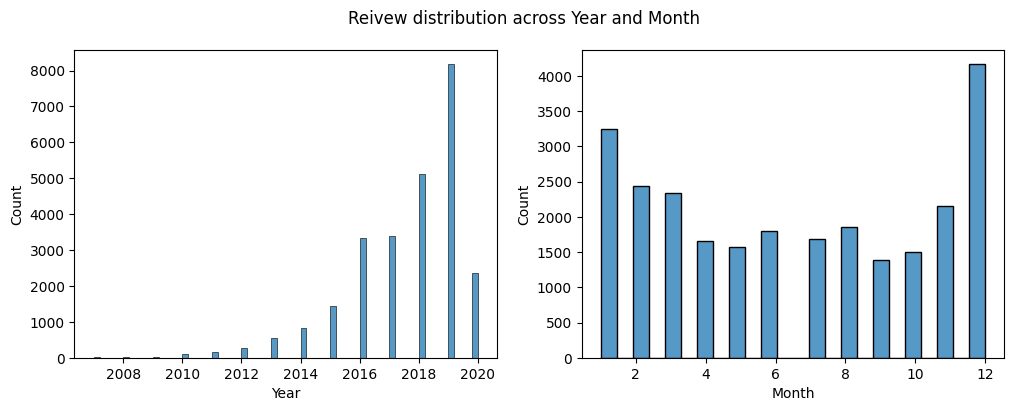

In [47]:
fig,axes = plt.subplots(1,2,figsize=(12,4))
fig.suptitle('Reivew distribution across Year and Month')
sns.histplot(ax=axes[0],data=pd.DatetimeIndex(walmart['Review Date']).year)
axes[0].set(xlabel='Year')
sns.histplot(ax=axes[1],data=pd.DatetimeIndex(walmart['Review Date']).month)
axes[1].set(xlabel='Month')

The number of reviews increasing with years. For year 2020, we only have reviews until March.
The number of reviews in Decemember and January is much higher than other months because these 2 months are holiday season. 

In [39]:
set(list(pd.DatetimeIndex(walmart['Crawl Timestamp']).year))

{2020}

Reviews are crawled in the same year of 2020

<Axes: xlabel='Day', ylabel='Count'>

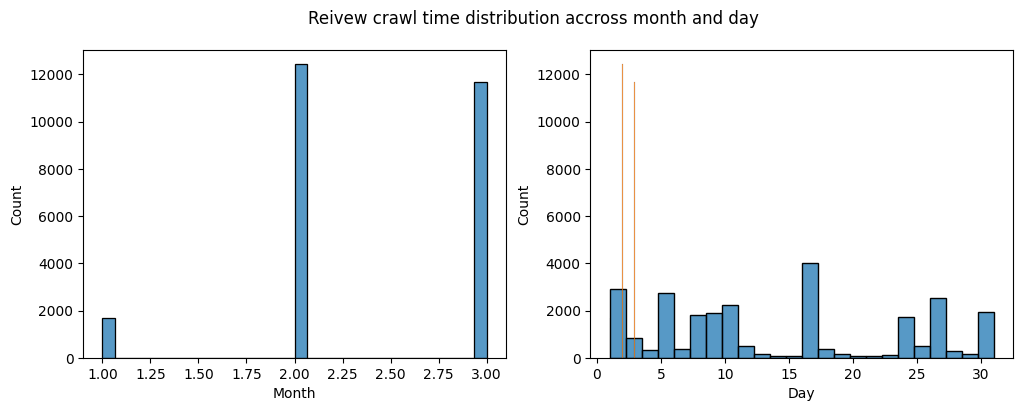

In [46]:
fig,axes = plt.subplots(1,2,figsize=(12,4))
fig.suptitle('Reivew crawl time distribution accross month and day')
sns.histplot(ax=axes[0],data=pd.DatetimeIndex(walmart['Crawl Timestamp']).month)
axes[0].set(xlabel='Month')
sns.histplot(ax=axes[1],data=pd.DatetimeIndex(walmart['Crawl Timestamp']).day)
axes[1].set(xlabel='Day')

sns.histplot(pd.DatetimeIndex(walmart['Crawl Timestamp']).month)

The reviews are crawled in a range of 3 months in 2020. Although I don't know how this information can contribute in the analysis

[Text(0.5, 0, 'Recommended Purchase')]

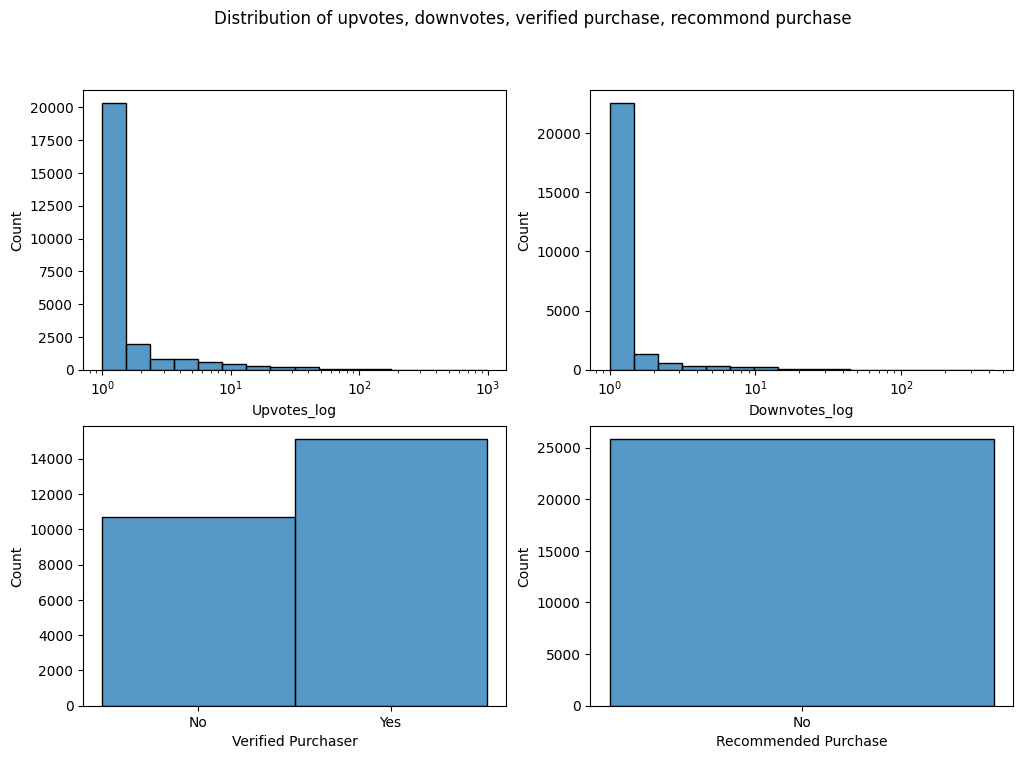

In [55]:
fig,axes = plt.subplots(2,2,figsize=(12,8))
fig.suptitle('Distribution of upvotes, downvotes, verified purchase, recommond purchase')
sns.histplot(ax=axes[0,0],data=walmart['Review Upvotes']+1,log_scale=True)
axes[0,0].set(xlabel='Upvotes_log')
sns.histplot(ax=axes[0,1],data=walmart['Review Downvotes']+1,log_scale=True)
axes[0,1].set(xlabel='Downvotes_log')
sns.histplot(ax=axes[1,0],data=walmart['Verified Purchaser'])
axes[1,0].set(xlabel='Verified Purchaser')
sns.histplot(ax=axes[1,1],data=walmart['Recommended Purchase'])
axes[1,1].set(xlabel='Recommended Purchase')

For most of revies the number of upvotes and downvotes are 0. Only few views have nozero upvotes or downvotes. The number of verified and non-verified purchaser are similar. For Recommended purchase, the value is always 'NO'. So I will delete the column.

In [57]:
walmart=walmart.drop(columns=['Recommended Purchase'])
walmart.shape

(25822, 13)

<Axes: xlabel='Rating', ylabel='Count'>

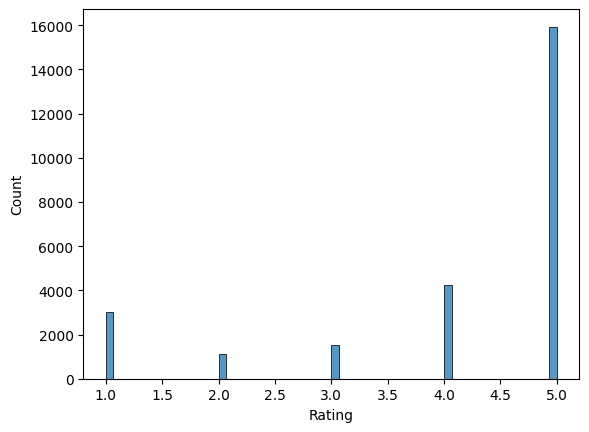

In [58]:
sns.histplot(walmart['Rating'])

5 stars is much higher than other cases.

## Feature correlation exploration

I will check the correlation between rating and different features: review year, review month, crawl month, crawl day, review upvotes, reveiw downvotes, verified purchase.

In [78]:
Rating_Year = pd.crosstab(walmart['Rating'],pd.DatetimeIndex(walmart['Review Date']).year)
Rating_Year = Rating_Year/Rating_Year.sum()

In [83]:
Rating_Month = pd.crosstab(walmart['Rating'],pd.DatetimeIndex(walmart['Review Date']).month)
Rating_Month = Rating_Month/Rating_Month.sum()

In [85]:
Rating_Crawl_Month = pd.crosstab(walmart['Rating'],pd.DatetimeIndex(walmart['Crawl Timestamp']).month)
Rating_Crawl_Month = Rating_Crawl_Month/Rating_Crawl_Month.sum()

In [87]:
Rating_Crawl_Day = pd.crosstab(walmart['Rating'],pd.DatetimeIndex(walmart['Crawl Timestamp']).day)
Rating_Crawl_Day = Rating_Crawl_Day/Rating_Crawl_Day.sum()

In [92]:
Rating_Review_Upvotes = pd.crosstab(walmart['Rating'],pd.cut(walmart['Review Upvotes'],bins=[0,10,100,1000],include_lowest=True))
Rating_Review_Upvotes = Rating_Review_Upvotes/Rating_Review_Upvotes.sum()

In [95]:
Rating_Review_Downvotes = pd.crosstab(walmart['Rating'],pd.cut(walmart['Review Downvotes'],bins=[0,10,100,1000],include_lowest=True))
Rating_Review_Downvotes = Rating_Review_Downvotes/Rating_Review_Downvotes.sum()

In [97]:
Rating_Verified_Purchaser = pd.crosstab(walmart['Rating'],walmart['Verified Purchaser'])
Rating_Verified_Purchaser = Rating_Verified_Purchaser/Rating_Verified_Purchaser.sum()

<Axes: xlabel='Verified Purchaser'>

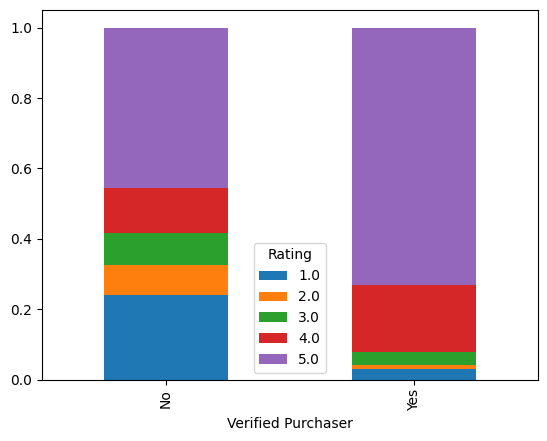

In [98]:
Rating_Verified_Purchaser.transpose().plot.bar(stacked=True)

[Text(0.5, 0, 'Crawl_Day')]

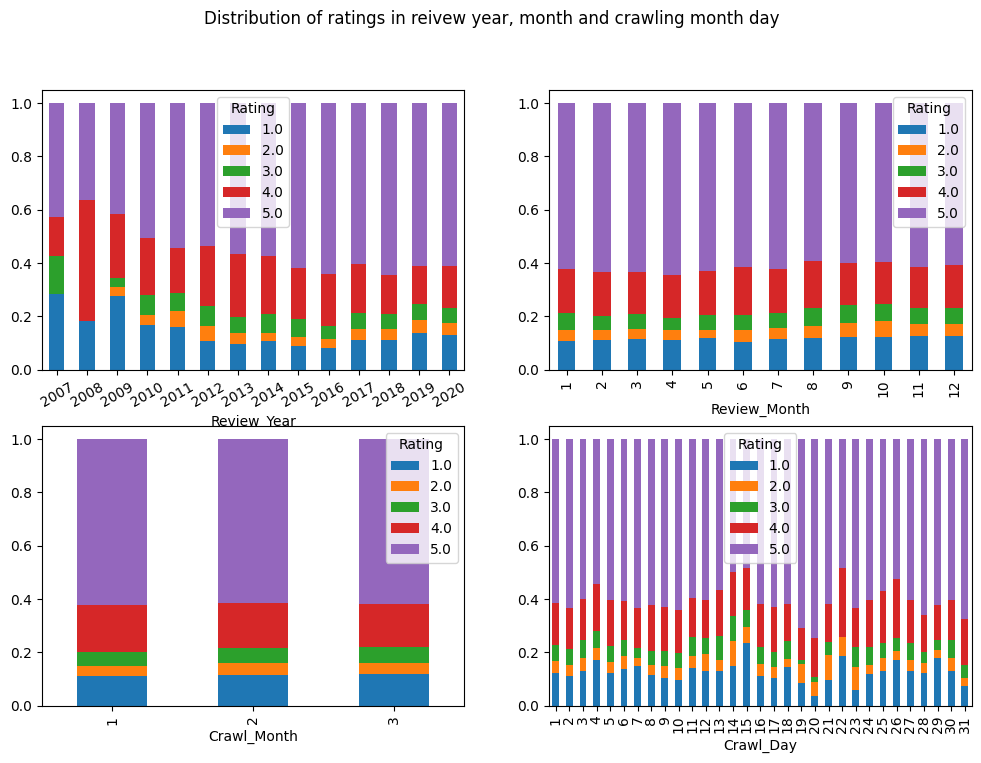

In [107]:
fig,axes = plt.subplots(2,2,figsize=(12,8))
fig.suptitle('Distribution of ratings in reivew year, month and crawling month day')
Rating_Year.transpose().plot.bar(ax=axes[0,0],stacked=True)
axes[0,0].set(xlabel='Review_Year')
axes[0,0].set_xticklabels(axes[0,0].get_xticklabels(),rotation=30)
Rating_Month.transpose().plot.bar(ax=axes[0,1],stacked=True)
axes[0,1].set(xlabel='Review_Month')
Rating_Crawl_Month.transpose().plot.bar(ax=axes[1,0],stacked=True)
axes[1,0].set(xlabel='Crawl_Month')
Rating_Crawl_Day.transpose().plot.bar(ax=axes[1,1],stacked=True)
axes[1,1].set(xlabel='Crawl_Day')

Rating distribution are not related to review year after 2016, which began to have large number of reviews. It is also not related to review months. Rating distribution is also not related to crawl month and crawl day. The flunctuations at crawl days are corresponds to days which have very low number of crawled reviews.

[Text(0.5, 0, 'Verified_Purchaser')]

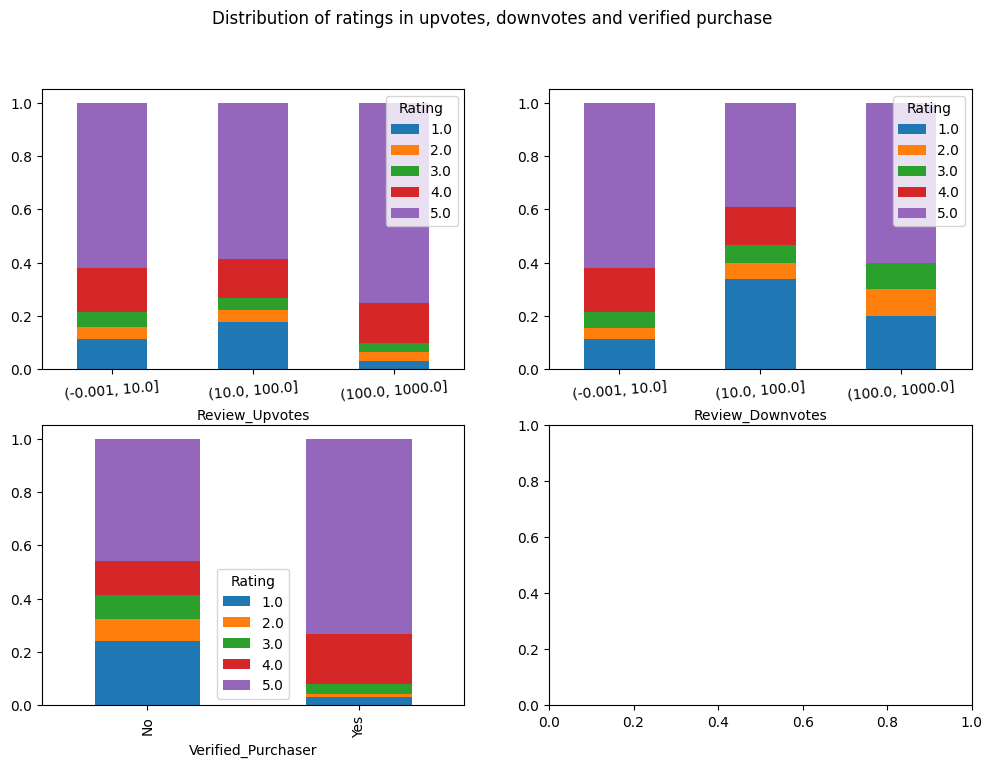

In [111]:
fig,axes = plt.subplots(2,2,figsize=(12,8))
fig.suptitle('Distribution of ratings in upvotes, downvotes and verified purchase')
Rating_Review_Upvotes.transpose().plot.bar(ax=axes[0,0],stacked=True)
axes[0,0].set(xlabel='Review_Upvotes')
axes[0,0].set_xticklabels(axes[0,0].get_xticklabels(),rotation=5)
Rating_Review_Downvotes.transpose().plot.bar(ax=axes[0,1],stacked=True)
axes[0,1].set(xlabel='Review_Downvotes')
axes[0,1].set_xticklabels(axes[0,1].get_xticklabels(),rotation=5)
Rating_Verified_Purchaser.transpose().plot.bar(ax=axes[1,0],stacked=True)
axes[1,0].set(xlabel='Verified_Purchaser')

Verified purhcaser tend to give high rating which means cusomer who give high ratings are more willing to verify their purhcase Or people who verify their purchase are more willing to give high ratings. It is interesting to check. 
Reivew upvotes means other customer aggree the reivewer's comments. Reivew downvotes means other customer disaggree the reivewer's comments. The ratings of 2, 3 and 4's upvotes fraction and downvotes fractions are generally not change. It seems that people are more likely to give upvotes and down votes for extreme ratings. We can find that for reivews with more than 100 upvotes, the fraction of 5 star increaed while fraction of 1 star decrease. The downvotes in [10,100) has higher fraction of 1 star and lower fraction of 5 start. The downvotes in  [100, 1000) are not reliable becase the number of reviews is only 10. 

# Semantic Analysis 

In [116]:
# transform to lower case
walmart['Review'] = walmart['Review'].str.lower()

In [118]:
# remove punctuations
walmart['Review'] = walmart['Review'].str.replace('[^\w\s]','',regex=True)

In [120]:
#remove number in the review text
walmart['Review'] = walmart['Review'].str.replace('\d', '', regex=True)

In [121]:
#remove stop words
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\wwhla\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


True

In [128]:
from nltk.corpus import stopwords
sw = stopwords.words('english')

In [125]:
walmart['Review'] = walmart['Review'].apply(lambda x: " ".join(x for x in str(x).split() if x not in sw))

In [129]:
#remove rare words: remove words only appearing one time
words_count = pd.Series(' '.join(walmart['Review']).split()).value_counts()
rare_word = words_count[words_count<=1]

In [131]:
walmart['Review'] = walmart['Review'].apply(lambda x: " ".join(x for x in x.split() if x not in rare_word))

In [136]:
from textblob import Word, TextBlob

In [140]:
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\wwhla\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\wwhla\AppData\Roaming\nltk_data...
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\wwhla\AppData\Roaming\nltk_data...


True

In [139]:
walmart['Review'].apply(lambda x: TextBlob(x).words)

0                [product, works, great, exactly, looking]
1        [carrier, said, phone, activated, yet, purchas...
2        [picture, tv, better, tv, ive, ever, owned, li...
4        [wellbalanced, highs, lows, bass, treble, good...
5        [cameras, every, one, experience, issue, ghz, ...
                               ...                        
30001    [verified, ability, playing, walker, texas, se...
30002    [bought, product, august, going, vacation, wor...
30003    [better, thought, really, super, light, fast, ...
30004    [dont, buy, product, sony, fixes, freezing, is...
30005    [far, love, tv, long, got, netflix, got, rid, ...
Name: Review, Length: 25822, dtype: object

In [141]:
walmart['Review']

0                      product works great exactly looking
1        carrier said phone activated yet purchased new...
2        picture tv better tv ive ever owned life extre...
4        wellbalanced highs lows bass treble good volum...
5        cameras every one experience issue ghz support...
                               ...                        
30001    verified ability playing walker texas season n...
30002    bought product august going vacation worked we...
30003       better thought really super light fast amazing
30004           dont buy product sony fixes freezing issue
30005    far love tv long got netflix got rid dish save...
Name: Review, Length: 25822, dtype: object

In [ ]:
df['Review'] = walmart['Review'].apply(lambda x: " ".join([Word(word).lemmatize() for word in x.split()])